### Ml Toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Restaurant Reviews | sentiment analysis (case study)

dataset source ==> https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews

### load data

In [2]:
df=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Explore data

In [5]:
# compare between positive and negative
df.Liked.value_counts(normalize=True)

1    0.5
0    0.5
Name: Liked, dtype: float64

<AxesSubplot:xlabel='Liked', ylabel='count'>

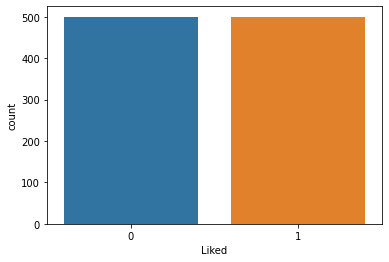

In [6]:
sns.countplot(data=df,x='Liked')

0 ==> negative <br>
1 ==> positive

we show the dataset is balanced

In [7]:
df['Count Letter']=df['Review'].apply(len)

In [8]:
df['Count Letter'].max()

149

In [9]:
# location id of max count letter
df['Count Letter'].argmax()

985

In [10]:
df.iloc[df['Count Letter'].argmax()]

Review          The problem I have is that they charge $11.99 ...
Liked                                                           0
Count Letter                                                  149
Name: 985, dtype: object

In [11]:
df.iloc[df['Count Letter'].argmax()]['Review']

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

### preprocessing text (Nltk / Spacy) 

In [12]:
s=df['Review'][0]

In [13]:
s

'Wow... Loved this place.'

In [40]:
import re
new_str=re.sub(r'[^a-zA-Z\s]','',s.lower())
new_str

'wow loved this place'

In [15]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

In [17]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# tokenization
from nltk.tokenize import word_tokenize
words=word_tokenize(new_str)
words

['wow', 'loved', 'this', 'place']

we decide to remove word (not) from stop words because it has mean in sentiment anlysis

In [19]:
stop_words.remove("not")

In [20]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [21]:
filter_word=[w for w in words if w not in stop_words]

In [22]:
print(words)
print(filter_word)

['wow', 'loved', 'this', 'place']
['wow', 'loved', 'place']


lemm and stemm for words

In [23]:
from nltk.stem import PorterStemmer,WordNetLemmatizer,LancasterStemmer

In [24]:
ps=PorterStemmer()
wl=WordNetLemmatizer()

In [25]:
word=" ".join(filter_word)
word

'wow loved place'

In [26]:
ps.stem(word)

'wow loved plac'

In [27]:
wl.lemmatize(word)

'wow loved place'

In [28]:
LancasterStemmer().stem(word)

'wow loved place'

In [29]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [30]:
for w in nlp(word):
    print(f"{w.text:{10}} {w.lemma_}")

wow        wow
loved      loved
place      place


In [41]:
def process_text(s):
    new_str=re.sub(r'[^a-zA-Z\s]','',s.lower())
    words=word_tokenize(new_str)
    ps=PorterStemmer()
    filter_word=[ps.stem(w) for w in words if w not in stop_words]
    sent=" ".join(filter_word)
    return sent

In [42]:
print(process_text(df['Review'][2]))

not tasti textur nasti


In [43]:
df.iloc[2,0]

'Not tasty and the texture was just nasty.'

In [44]:
df['Review_cleaning']=df['Review'].apply(process_text)

In [45]:
df.head()

,Review,Liked,Count Letter,Review_cleaning
0,Wow... Loved this place.,1,24,wow love place
1,Crust is not good.,0,18,crust not good
2,Not tasty and the texture was just nasty.,0,41,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,select menu great price


### Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv=CountVectorizer()
X=cv.fit_transform(df['Review_cleaning']).toarray()

In [48]:
X.shape

(1000, 1609)

In [49]:
df_new=pd.DataFrame(X,columns=cv.get_feature_names())
df_new

C:\Users\engah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yelper,yet,youd,youll,your,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df['Liked']

In [52]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.20,random_state=0)
x_train.shape,x_test.shape

((800, 1609), (200, 1609))

In [57]:
y_train.shape

(800,)

### Model Building

In [53]:
import tensorflow as tf
from tensorflow import keras

In [60]:
model=keras.Sequential([
    keras.layers.Dense(512,input_dim=1609,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [61]:
model.fit(x_train,y_train,epochs=25,verbose=2)

Epoch 1/25
25/25 - 1s - loss: 0.6626 - accuracy: 0.6775 - 883ms/epoch - 35ms/step
Epoch 2/25
25/25 - 0s - loss: 0.4869 - accuracy: 0.9150 - 134ms/epoch - 5ms/step
Epoch 3/25
25/25 - 0s - loss: 0.3130 - accuracy: 0.9613 - 134ms/epoch - 5ms/step
Epoch 4/25
25/25 - 0s - loss: 0.1879 - accuracy: 0.9688 - 136ms/epoch - 5ms/step
Epoch 5/25
25/25 - 0s - loss: 0.1169 - accuracy: 0.9850 - 135ms/epoch - 5ms/step
Epoch 6/25
25/25 - 0s - loss: 0.0769 - accuracy: 0.9912 - 138ms/epoch - 6ms/step
Epoch 7/25
25/25 - 0s - loss: 0.0554 - accuracy: 0.9925 - 137ms/epoch - 5ms/step
Epoch 8/25
25/25 - 0s - loss: 0.0419 - accuracy: 0.9975 - 136ms/epoch - 5ms/step
Epoch 9/25
25/25 - 0s - loss: 0.0337 - accuracy: 0.9975 - 136ms/epoch - 5ms/step
Epoch 10/25
25/25 - 0s - loss: 0.0280 - accuracy: 0.9975 - 139ms/epoch - 6ms/step
Epoch 11/25
25/25 - 0s - loss: 0.0236 - accuracy: 0.9962 - 135ms/epoch - 5ms/step
Epoch 12/25
25/25 - 0s - loss: 0.0200 - accuracy: 0.9975 - 134ms/epoch - 5ms/step
Epoch 13/25
25/25 - 0s -

In [62]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.5215 - accuracy: 0.8500


[0.5214968323707581, 0.8500000238418579]

In [64]:
prediction=model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [65]:
prediction[0]

array([0.00465754], dtype=float32)

In [69]:
y_test.iloc[0]

0

In [70]:
prediction[1],y_test.iloc[1]

(array([0.00099977], dtype=float32), 0)

In [71]:
for i in range(len(prediction)):
    if prediction[i] < 0.5:
        prediction[i]=0
    else:
        prediction[i]=1
prediction

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [77]:
prediction=prediction.reshape((200,))

In [81]:
prediction.shape,y_test.shape

((200,), (200,))

In [85]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [82]:
confusion_matrix(prediction,y_test)

array([[79, 12],
       [18, 91]], dtype=int64)

In [84]:
f1_score(prediction,y_test)

0.8584905660377358

In [87]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        91
         1.0       0.88      0.83      0.86       109

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



### Model Deployment

In [88]:
import joblib

In [89]:
joblib.dump(model,"restaurant.pkl")

INFO:tensorflow:Assets written to: ram://dd3afd06-cf89-4338-8347-ca023c4b79f9/assets


['restaurant.pkl']

In [94]:
model.save("model.h5")

In [99]:
model_run=keras.models.load_model("model.h5")

In [100]:
model_run.predict(x_test)

7/7 [==============================] - 0s 3ms/step


array([[4.65754326e-03],
       [9.99766984e-04],
       [1.12467343e-02],
       [1.09315501e-03],
       [6.59601167e-02],
       [1.73996940e-01],
       [9.99998271e-01],
       [7.59337991e-02],
       [4.46314644e-03],
       [9.98082340e-01],
       [9.90418196e-01],
       [9.99493957e-01],
       [9.69727218e-01],
       [9.99759316e-01],
       [9.99127209e-01],
       [9.99999225e-01],
       [3.05010319e-01],
       [1.31593886e-04],
       [2.80934328e-04],
       [9.99351978e-01],
       [4.80429411e-01],
       [1.18559422e-02],
       [9.95367229e-01],
       [7.81415164e-01],
       [8.79130781e-01],
       [9.12552416e-01],
       [7.55154252e-01],
       [9.99999642e-01],
       [9.99995887e-01],
       [2.52457242e-02],
       [9.87505674e-01],
       [9.47275102e-01],
       [5.74959338e-01],
       [8.05367053e-01],
       [9.97542083e-01],
       [1.13504000e-01],
       [1.32558309e-02],
       [3.26740921e-01],
       [4.83632982e-02],
       [9.99985158e-01],


In [101]:
process_text("Apple is good fruit")

'appl good fruit'